## Songs Lyrics Matching

In [3]:
import pandas as pd
%pip install lyricsgenius
! pip install pycld2
import pycld2 as cld2
from lyricsgenius import Genius
from datetime import datetime
import re
import string 
import csv
import seaborn as sns
import matplotlib.pyplot as plt


Genius_api = Genius('PqFpIzApYNaLH7mF-sUX4cIq_lSgu148NNQuEIZ4NB9Y1rQp0iyKoEE2c4PqOdnH',sleep_time=0.001, verbose=False)

Note: you may need to restart the kernel to use updated packages.


In [2]:
spotify_df = pd.read_csv('data.csv')
#display(spotify_df)
df = spotify_df.drop(columns = ['id'])
#df

In [3]:
# remove punctuation
def remove_punctuation(txt):
    txt_nonpunc =''.join([c for c in txt if c not in string.punctuation])
    return txt_nonpunc
df['name'] = df['name'].apply(lambda x:remove_punctuation(x))
df['artists'] = df['artists'].apply(lambda x:remove_punctuation(x))

In [4]:
# seperate df into smaller ones to release computational stress
df_1980to2000 = df[ (1980 <= df['year']) & (df['year'] <=2000)  ]

In [6]:
# filter out song name which contains some words that will give wrong lyrics
df_1980to2000 = df_1980to2000[df_1980to2000['name'].str.contains('Unreleased|Remaster|Version|Live|Rapper|Demo|Mixed')==False]
df_1980to2000

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
9155,0.434000,The Drifters,0.707,150667,0.435,0,0.024700,9,0.0947,-10.206,0,Jet Black,14,1991,0.0478,123.647,0.647,1991
9169,0.355000,The Shadows,0.589,127573,0.730,0,0.531000,2,0.1010,-7.155,1,Shotgun,13,1991,0.0362,129.083,0.951,1991
9191,0.220000,The Drifters,0.714,118000,0.644,0,0.524000,5,0.0850,-9.441,1,Chinchilla,9,1991,0.0361,129.765,0.954,1991
9235,0.435000,The Shadows,0.640,166107,0.261,0,0.000164,11,0.2840,-13.356,0,Blue Star,11,1991,0.0315,112.896,0.582,1991
11863,0.011000,ACDC,0.310,255493,0.700,0,0.009650,9,0.0828,-5.678,1,Back In Black,84,1980-07-25,0.0470,188.386,0.763,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170183,0.865000,Hootie The Blowfish,0.494,178733,0.161,0,0.000003,7,0.6370,-14.456,1,I Hope That I Dont Fall in Love with You,42,2000-10-24,0.0287,92.821,0.340,2000
170185,0.489000,Christina Aguilera,0.486,248800,0.694,0,0.000000,5,0.3700,-6.690,0,Angels We Have Heard On High,42,2000-11-03,0.0836,175.725,0.381,2000
170187,0.462000,Kirk Whalum,0.541,276400,0.756,0,0.649000,2,0.1600,-6.867,1,Now Til Forever,40,2000-10-17,0.0392,170.715,0.568,2000
170188,0.000497,Majority of One,0.167,209107,0.883,0,0.001270,11,0.0788,-7.775,0,Palace,0,1993-03-02,0.0671,159.917,0.310,1993


In [7]:
# mapping Genius lyrics with spotify dataset based on song title and artist--df_1960to2000

all_song_df_1980to2000 = pd.DataFrame()

start_time = datetime.now()
print("Started at {}".format(start_time))

for i in range(0,len(df_1980to2000)):
    rolling_pct = int((i/len(df_1980to2000))*100) #check the progress
    print(str(rolling_pct) + "% complete." + " Collecting Record " + str(i) +" of " +
          str(len(df_1980to2000)) +". Year " + str(df_1980to2000.iloc[i]['year']) + "." + " Currently collecting " + 
          df_1980to2000.iloc[i]['name'] + " by " + df_1980to2000.iloc[i]['artists'] + " "*50, end="\r")
    title = df_1980to2000.iloc[i]['name']
    title = re.sub("and","&",title)  # "and" is "&" in Genius
    artist = df_1980to2000.iloc[i]['artists']
    artist = re.sub("and","&",artist) # "and" is "&" in Genius
    
    try:
        song = Genius_api.search_song(title,artist)
        song_lyrics = re.sub("\n", " ", song.lyrics) #Remove newline breaks, we won't need them.

    except:
        song_lyrics = "null"

        
    row = {
        #"album": song_album,
        "lyrics": song_lyrics,
        #"writers": song_writer_artists,
        "song title": df_1980to2000.iloc[i]['name'],
        "artist": df_1980to2000.iloc[i]['artists'],
        "release date": df_1980to2000.iloc[i]['release_date'],
        "year": df_1980to2000.iloc[i]['year'],
        "popularity": df_1980to2000.iloc[i]['popularity'],
        "acousticness": df_1980to2000.iloc[i]['acousticness'],
        "danceability": df_1980to2000.iloc[i]['danceability'],
        "duration_ms": df_1980to2000.iloc[i]['duration_ms'],
        "energy": df_1980to2000.iloc[i]['energy'],
        "explicit": df_1980to2000.iloc[i]['explicit'],
        "instrumentalness": df_1980to2000.iloc[i]['instrumentalness'],
        "key": df_1980to2000.iloc[i]['key'],
        "liveness": df_1980to2000.iloc[i]['liveness'],
        "loudness": df_1980to2000.iloc[i]['loudness'],
        "mode": df_1980to2000.iloc[i]['mode'],
        "speechiness": df_1980to2000.iloc[i]['speechiness'],
        "tempo": df_1980to2000.iloc[i]['tempo'],
        "valence": df_1980to2000.iloc[i]['valence'],

    }
    all_song_df_1980to2000 = all_song_df_1980to2000.append(row,ignore_index=True)
    

end_time = datetime.now()
print("\nCompleted at {}".format(end_time))
print("Total time to collect: {}".format(end_time - start_time))

Started at 2021-06-09 22:55:45.270498
99% complete. Collecting Record 36232 of 36233. Year 2000. Currently collecting Summer Nights by Mike Hype                                                                                                    l                                                                                                                e Montréal Charles Dutoit                                                                                                                  
Completed at 2021-06-10 12:10:51.402573
Total time to collect: 13:15:06.132075


In [8]:
# filter songs with lyrics
songs_with_lyrics_1980to2000 = all_song_df_1980to2000[all_song_df_1980to2000['lyrics'] !='null']  
#songs_with_lyrics

In [24]:
test2 = songs_with_lyrics_1980to2000.groupby(['year'])
test2.size()

year
1980.0    809
1981.0    799
1982.0    872
1983.0    839
1984.0    865
1985.0    882
1986.0    833
1987.0    808
1988.0    848
1989.0    772
1990.0    752
1991.0    892
1992.0    788
1993.0    789
1994.0    782
1995.0    766
1996.0    823
1997.0    789
1998.0    825
1999.0    847
2000.0    870
dtype: int64

In [25]:
# store to csv
songs_with_lyrics_1980to2000.to_csv("all_songs_1980to2000.csv")

## Combine all dataset and preprocessing

In [30]:
songs_with_lyrics_after2001 = pd.read_csv("all_songs_after2001.csv",index_col=0)
songs_with_lyrics_1980to2000= pd.read_csv("all_songs_1980to2000.csv",index_col=0)
songs_with_lyrics_1960to1979= pd.read_csv("all_songs_1960to1979.csv",index_col=0)
songs_with_lyrics_after1960 = pd.concat([songs_with_lyrics_after2001,songs_with_lyrics_1980to2000,songs_with_lyrics_1960to1979],ignore_index=True)
songs_with_lyrics_after1960.head(5)

,acousticness,artist,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,lyrics,mode,popularity,release date,song title,speechiness,tempo,valence,year
0,0.288,Gerry The Pacemakers,0.409,115240.0,0.639,0.0,0.0,6.0,0.3430,-7.628,Hello little girl Hello little girl Hello litt...,1.0,30.0,2008-02-11,Hello Little Girl,0.0302,145.903,0.928,2008.0
1,0.318,Gerry The Pacemakers,0.468,111613.0,0.538,0.0,0.0,5.0,0.3160,-8.666,825 ALL NIGHT – PAROV STELAR 824 BIG JET PLANE...,1.0,26.0,2008-02-11,Dont Ever Stray,0.0325,170.588,0.909,2008.0
2,0.330,Gerry The Pacemakers,0.550,135867.0,0.552,0.0,0.0,7.0,0.0907,-10.334,"I like it, I like it I like the way you run yo...",1.0,24.0,2008-02-11,I Like It Main,0.0344,147.715,0.964,2008.0
3,0.130,James Brown The Famous Flames,0.295,171933.0,0.373,0.0,0.0,5.0,0.6410,-10.316,[Chorus: The Charmaines] Let's make this Chris...,1.0,11.0,2007-12-04,Lets Make Christmas Mean Something This Year ...,0.0374,172.762,0.378,2007.0
4,0.387,Gerry The Pacemakers,0.515,128867.0,0.655,0.0,0.0,4.0,0.0864,-6.365,Your smile can make the darkness turn to light...,0.0,12.0,2008-02-11,Youve Got What I Like,0.0255,91.705,0.886,2008.0


In [33]:
songs_with_lyrics_after1960.to_csv('songs_with_lyrics_after1960.csv')

In [62]:
#------ Filter out some faulty lyrics due to matching------#
df_copy = songs_with_lyrics_after1960.copy()
df = df_copy[df_copy['lyrics'].str.contains('Intro|Chorus|Verse')]
df = df[df['lyrics'].str.contains('Last updated|feat|Version')==False]
print('Total rows after cleaning wrong lyrics:',len(df))

#------ Remove brackets such as [Intro][Verse][Chorus] as they provide little sentiment value ------# 
df.reset_index(inplace=True)
df.drop(['index'],axis=1)
for i in range(0,14729):
    df['lyrics'][i] = re.sub(r'\[[^\]]*\]', '', df['lyrics'][i])
df = df.drop(['index'],axis=1)

#------ Remove duplicate ------#
#df = df.rename(columns={'song title': 'song_title'})
# Any duplicate song_title?
#print('Total rows: ', len(df))
#print('Unique rows based on song title', len(df.song_title.unique()))

# Drop duplicate data based on song_title, artist, year
df = df.drop_duplicates(['song_title', 'artist', 'year'])
print('Total rows after removing duplicates songs: ', len(df))

#------ Remove valence == 0.5 ------#
df_mid_valence = df[df['valence'] == 0.5]
df= df.drop(df[df.valence == 0.5].index).reset_index(drop=True)
print('Total rows after removing valence is 0.5: ',len(df))


#------ Remove non-English lyrics ------#
indexes_to_drop = []
except_id = []
for i in range(len(df)):
  try:
    text_content = df.lyrics[i]
    _, _, _, detected_language = cld2.detect(text_content, returnVectors=True)
    if(len(detected_language) != 1 or detected_language[0][3] != 'en'):
        indexes_to_drop.append(i)
    #print('Lyrics not in English: {}'.format(i))
  except:
    except_id.append(i)
    #print('Not in data: {}'.format(i))

print('Num of Lyrics not all in English: {}'.format(len(indexes_to_drop)))
print('Num of Data with KeyError: {}'.format(len(except_id)))
indexes_to_keep = set(range(df.shape[0])) - set(indexes_to_drop) - set(except_id)
df_en = df.take(list(indexes_to_keep)).reset_index(drop=True)
print('Total English songs: ', len(df_en))


#------ Change all text to lower case ------#   #ONLY IN LYRICS WITH SPACE
df_en['lyrics'] = [word.lower() for word in df_en['lyrics']]

#------ Normalize slang words based on dictionary ------#
with open('slang_meaning.csv') as file:
    reader = csv.reader(file)
    next(reader)
    dictionary = {rows[0]: rows[1] for rows in reader}
      
#print(df_en)
df_edit = df_en.replace({'lyrics': dictionary})
# check how many songs were edited
merged_data = df_en[~df_en.apply(tuple, 1).isin(df_edit.apply(tuple, 1))]
merged_data


Total rows after cleaning wrong lyrics: 30141


<ipython-input-62-5a6618ca0716>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'][i] = re.sub(r'\[[^\]]*\]', '', df['lyrics'][i])


Total rows after removing duplicates songs:  28435
Total rows after removing valence is 0.5:  28399
Num of Lyrics not all in English: 3993
Num of Data with KeyError: 4
Total English songs:  24402


,acousticness,artist,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,lyrics,mode,popularity,release date,song_title,speechiness,tempo,valence,year


/Users/iriszzwanzig/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'negative'), Text(1, 0, 'positive')]

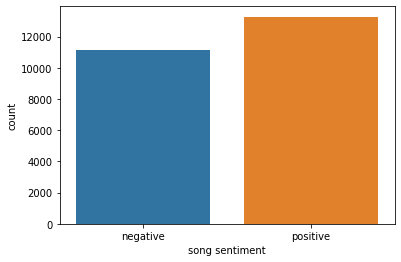

In [63]:
def to_sentiment_2classes(valence):
  if valence < 0.5:
    return 0
  elif valence > 0.5:
    return 1
  else:
    pass
df_en['sentiment_2classes'] = df_en.valence.apply(to_sentiment_2classes)
#df_en.sentiment_2classes = df_en.sentiment_2classes.astype(int)
# Plot the score distribution after conversion
ax = sns.countplot(df_en.sentiment_2classes)
class_names = ['negative', 'positive']
plt.xlabel('song sentiment')
ax.set_xticklabels(class_names)

In [70]:
print('negative songs shape:{}'.format(df_en[df_en['sentiment_2classes']==0].shape))
print('positive songs shape:{}'.format(df_en[df_en['sentiment_2classes']==1].shape))

negative songs shape:(11129, 20)
positive songs shape:(13273, 20)


In [67]:
#------ To generate 3 classes, we need to add valence == 0.5 back to df ------#
# add valence == 0.5 back to df
df_en_all_valence = df_en.append(df_mid_valence, ignore_index=True, sort=False)

/Users/iriszzwanzig/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'negative'), Text(1, 0, 'neutral'), Text(2, 0, 'positive')]

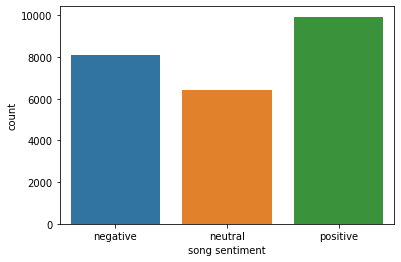

In [68]:
def to_sentiment_3classes(valence):
  if valence < 0.4:
    return 0
  elif valence > 0.6:
    return 2
  else:
    return 1
df_en_all_valence['sentiment_3classes'] = df_en_all_valence.valence.apply(to_sentiment_3classes)

# Plot the score distribution after conversion
ax = sns.countplot(df_en_all_valence.sentiment_3classes)
class_names = ['negative', 'neutral','positive']
plt.xlabel('song sentiment')
ax.set_xticklabels(class_names)

In [69]:
print('negative songs shape:{}'.format(df_en_all_valence[df_en_all_valence['sentiment_3classes']==0].shape))
print('neutral songs shape:{}'.format(df_en_all_valence[df_en_all_valence['sentiment_3classes']==1].shape))
print('positive songs shape:{}'.format(df_en_all_valence[df_en_all_valence['sentiment_3classes']==2].shape))

negative songs shape:(8114, 21)
neutral songs shape:(6393, 21)
positive songs shape:(9931, 21)


<AxesSubplot:xlabel='year'>

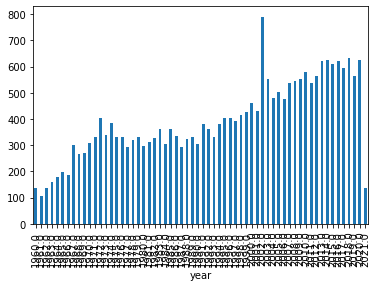

In [61]:
# songs over years
df_gb = df_en.groupby(['year']).size() 
df_gb.plot(kind = 'bar')

In [71]:
df_en_all_valence = df_en_all_valence.to_csv('all_songs_after1960_preprocessed_classes.csv')